# WeRateDogs Analysis

WeRateDogs is a twitter account with the handle `@dog_rates`. They are a popular comedy account known for their interesting use of dog vocabulary and for their unique dog rating system. Some examples are provided in the images below.

![dog_vocab](dog-vocab.png)

![dog_tweets](./dog-tweets.jpg)

The purpose of this analysis is to analyze the metrics associated with popularity related to the tweet textual data. Popularity is measured in retweets and likes for posts. Possible metrics associated with increased popularity are time of day, time since account creation, dog breed posted, and dog rating. A data story is also told in the end about the content of the tweets via wordcloud and sentiment analysis. This provides a useful summary for understanding at a birds eye view the textual data which is analyzed in this Notebook.

This type of analysis presents textual extraction challenges that leads to relatively complex data wrangling. Therefore much of this Jupyter Notebook is dedicated to generating the dataframe to perform the actual analytics on. If the interest of the viewer is on the results, feel free to skip to the section labeled `Analysis`. It is the belief of the author that following the data wrangling process below will provide the user with contextual information about the original data sources that will be useful when reading the analysis phase or wanting to dig deeper into the data itself.

## Libraries Used

We will be using the python data analytics ecosystem for this analysis. That includes numpy and pandas as the core data structures. We will use matplotlib and seaborn for data visualizations.

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling Process



### Data Gathering

The first dataset was prepared by the website Udacity.com, a data analytics educational website, in partnership with the WeRateDogs team. 

Initially the WeRateDogs team only provided the text for the tweets. Elements of the textual data were extracted by the Udacity team and written to a csv file. The extraction wasn't performed successfully and will require validation and possibly need to be redone completely. 

In [273]:
archived_tweets_df = pd.read_csv("twitter_archive_enhanced.csv")
archived_tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The next dataset of interest was a dataset created by Udacity.com of the breed of dog classified. This dataset was built by running the data through a neural network to classify the dog breads. They provide the probabilistic confidence in their prediction, three predictions, and whether it was predicted to be a dog breed.

This dataset is available on a public udacity server, and will be retrieved by the python requests library.

In [274]:
import requests

In [275]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
resp = requests.get(url)

In [276]:
with open("image_prediction.tsv", "wb") as file:
    file.write(resp.content)

In [277]:
image_prediction_df = pd.read_csv("image_prediction.tsv", delimiter="\t")

In [278]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The third and final dataset is data pulled from the twitter api. The retweet count and the like count will be used in our analysis to measure popularity. It is the metric of interest we would like to predict.

We will be using a library called tweepy for accessing the twitter api. We will be writing each tweets data to its own line to a file called `tweets_json.txt`. We will build a dataset with columns: `tweet_id, retweet_count, favorite_count`.

We will be querying the twitter api using the tweet ids from the WeRateDogs enhanced archive. 

In [279]:
import tweepy

Below we read in API keys and information from a local json file.

In [280]:
import json

In [281]:
api_secrets = None
try:
    with open("api_keys.json", "r", encoding="utf-8") as file:
        api_secrets = json.load(file)
except FileNotFoundError as err:
    pass

In [282]:
def query_api(api_secrets):
    if api_secrets == None:
        return None
    c_key = api_secrets["api_key"]
    c_sec = api_secrets["api_secret_key"]
    a_token = api_secrets["access_token"]
    a_sec = api_secrets["access_token_secret"]
    auth = tweepy.OAuthHandler(c_key, c_sec)
    auth.set_access_token(a_token, a_sec)
    api = tweepy.API(auth, wait_on_rate_limit=True,
                    wait_on_rate_limit_notify=True)
    return api

We will only create our JSON text file if both below are true:

- We queried the api successfully

- The text file doesn't currently exist

This allows us to publish this jupyter notebook and make it runnable, while also not giving away API keys. The dataset is saved so that the analysis can be reproduced regardless if the api was queried this time or a time before this.

In [283]:
import time

In [284]:
def query_api_with_tweet_ids(api_resp_obj, twitter_ids):
    if api_resp_obj == None:
        print("Failed to provide api query object. Exiting")
        return None
    responses = []
    start_time = time.time()
    failure_n = 0
    print("Attempting to query {} twitter ids".format(len(twitter_ids)))
    for tweet_id in twitter_ids:
        one_start = time.time()
        print("\tAttempting to retrieve tweet {}".format(tweet_id))
        try:
            prac_stat = api_resp_obj.get_status(tweet_id)
        except:
            prac_stat = None
        if prac_stat != None:
            print("\t\tSuccessfully retrieved tweet {}".format(tweet_id))
            responses.append(prac_stat._json)
        else:
            print("\t\tFailure in retrieval of tweet {}".format(tweet_id))
            failure_n += 1
        one_end = time.time()
        print("\t\tTime took: {}".format(one_end-one_start))
    end_time = time.time()
    print("End of query. {} out of {} failed".format(failure_n, len(twitter_ids)))
    print("Time took: {}".format(end_time-start_time))
    return responses

In [285]:
api_resp = query_api(api_secrets)

In [286]:
import os
def write_tweets_to_file():   
    text_file = "tweet_json.txt"
    if api_resp != None and os.path.exists(text_file) == False:
        # First we will create a list of python dicts for the responses
        # of the api
        tweet_ids = list(archived_tweets_df.tweet_id)
        responses = query_api_with_tweet_ids(api_resp,  tweet_ids)
        print("\nWriting responses to file {}.\n".format(text_file))
        with open(text_file, "w+") as write_file:
            for json_block in responses:
                print("Writing block {} to file".format(json_block["id"]))
                new_line = json.dumps(json_block) + '\n'
                write_file.write(new_line)
        print("\nOperation finished. Exiting.")
    else:
        inp = input("Query failed, file already exists. Remove file? (y/n)")
        if inp == "y":
            print("Deleting file. Exiting.")
            os.remove(text_file)
        else:
            print("Exiting without delete.")

The below line of code takes 20 minutes to run. It queries all the tweets from the user WeRateDogs from the public twitter API and writes them to a text file, one json tweet block per line. It is commented out for speed of execution purposes.

In [287]:
# write_tweets_to_file()

This below block of code reads the API data from a local text file and places it into a pandas dataframe for analysis.

In [288]:
extended_tweet_df = pd.DataFrame(columns=["tweet_id",
                                          "retweet_cnt",
                                          "like_cnt"], dtype=np.int64)

with open("tweet_json.txt", "r", encoding='utf-8') as f:
    while True:
        json_raw = f.readline()
        if not json_raw:
            break
        json_dict = json.loads(json_raw)
        tweet_id = json_dict["id"]
        tweet_retweet = json_dict["retweet_count"]
        tweet_like = json_dict["favorite_count"]
        new_row = {"tweet_id": tweet_id, "retweet_cnt": tweet_retweet,
        "like_cnt": tweet_like}
        extended_tweet_df = extended_tweet_df.append(new_row,
                                                     ignore_index=True)


We can see below that the data of interest was successfully pulled.

In [289]:
extended_tweet_df.sample(5)

,tweet_id,retweet_cnt,like_cnt
209,850333567704068097,324,3418
1155,719367763014393856,739,2794
1178,716439118184652801,207,2369
2315,666099513787052032,61,143
2162,668979806671884288,334,769


We have now collected all the data pre analysis. The next step of the data wrangling process is to assess the data for quality and tidiness issues and to then clean the data for analysis. 

Having said that, there will be plenty of issues with our datasets, too many to address. So it makes sense to first briefly go over the analysis of our data we plan on doing. We will focus on 3 questions to guide our data wrangling efforts:

- The first analysis of interest is the relationship between ratings and retweet/ like counts. Is there a correlation between retweets/ likes and rating or is the rating more symbolic then predictive? 

    - Before this analysis is performed we will also investigate the relationship between retweets and likes. If they are heavily correlated, we can engineer a feature that averages them to simplify the analysis.

- The second analysis will be what is the distribution of predicted dog breed to retweet/ like counts. Do users have a favorite breed or are they all mostly even? What is the distribution of confidence of the breeds predicted?

- The third analysis of interest is a word cloud of aggregate text for all the textual posts. This will show us the most popular words of the WeRateDogs page. We aim to not have punctuation, and to have mostly nouns and verbs. We want to see words like 'dog' and 'puppy' rather then words like 'the' and 'and'. We also don't want 'DOG' and 'Dog' to appear as well in our word bubble. Lastly we will perform a sentiment analysis on the data to get summary statistics of the corpus of tweets

### End of Data Gathering

Now that we have the three dataframes for analysis, we have begun seeing what analytics we want to perform, which will guide our data wrangling decisions. 

The three dataframes we have collected are the archived tweet data from the csv file given by Udacity in partnership with the WeRateDogs team, the image prediction files Udacity created using neural networks to predict dog breeds, and the like/ retweet counts given to us from the twitter API of user WeRateDogs.

We will focus our analysis on the relationship between dog ratings and retweet/ like counts, the relationship between retweet/ like count and dog breeds, and the frequencies of words used for the WeRateDogs page. We will also investigate the relationship between likes and retweets and possibly engineer a feature to summarize the two ratings if they are highly correlated.


## Data Assessment

Now that we have finished gathering data and planned the analysis we want out of our data, we can begin to assess our data. We will split up our assessment into data quality issues (dirty data) and data tidyness issues (messy data)

For the first analysis we want to use retweet / like counts and dog ratings. We can first see if there is any missing columns for our area of interest.

We can see that our retweet/like counts are not missing any rows/ columns. However there is more ID's from our archived data then there is for our retweet/like data. Because the retweet/ like is a major metric for two our of our three analysis we need to decide what to do with the columns that are missing. This is a data quality issue resulting from incompleteness, which should be addressed first.

We will fix this with a left join. We will allow for NULLs for the retweet/ like count. That is because we shouldn't drop rows that have text data because we can use it to make our third analysis richer.

In [290]:
extended_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   tweet_id     2331 non-null   int64
 1   retweet_cnt  2331 non-null   int64
 2   like_cnt     2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [291]:
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
142,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,0.100554,False,crane,0.084713,False
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False


In [292]:
archived_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

We also can see that we have many columns that are not necessary for our analysis. We should drop the columns we aren't planning on directly using. The goal is to have one table of these columns:

- tweet_id

- text

- rating_numerator

- rating_denominator

- name

- retweet_cnt

- like_cnt

- p1

- p1_confidence

If we focus on p1 and p1_confidence as two metrics we care about, it leads us to a data validity issue and a tidyness issue. For our analysis, we don't want items that aren't dogs to be in our dataset. So we need to make sure there are null values if p1_dog == False. This leads to a data structure issue and a data validity issue, both of which should be recorded. Our data tidyness issue is that we want to have p1 and p1_confidence without needing p1_dog. Our data validity issue is we want p1_dog to always be true or else NULL to be recorded.

For our third textual analysis, we will want to clean the data so that we don't have punctuation or words like "and"/ "the". We also need to make sure all of it is lowercase. Things like that. This will give us a high quality word cloud. This is a consistency issue, where we want a specific set of words and format on the text column.

Also the Udacity team that created the archived dataset warned that the ratings might not be accurate, so we need to vaidate that the ratings are accurate and fix them where necessary. The name data must be validated as well. Note that both validations can be achived by searching for the rating and name in the text column and seeing where it doesn't line up.

In [293]:
archived_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Now that we see the key metrics we need to track, we can write down specific ratings and names to fix during our data quality fix.

If we look below we can see the name data point might be unusable. We have the majority of the data points being None or a, which is not very helpful. We can record that, but we may want to remove it from our analysis altogether.

We can see that the ratings look inaccurate as well. A lot of the values seem extremely high or low for the numerators and the denominators seem like they should always be 10. We need to decide what to do about that during the cleaning phase.

In [294]:
test_against = archived_tweets_df[["text", "name", "rating_numerator", "rating_denominator"]].copy()

In [295]:
archived_tweets_df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
officially      1
Willem          1
Ebby            1
Roscoe          1
Lilli           1
Name: name, Length: 957, dtype: int64

In [296]:
archived_tweets_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [297]:
archived_tweets_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Regaring the textual data, we can see a few things that will mess up the quality of our word bubble. We don't want upper and lowercase, just lowercase. We also don't want any punctuation, except for ratings of the form dd/dd. We also don't want links to be included in our word bubble. Also words like "is" and "and" shouldn't be included, because they will dominate the word bubble and will make it not very interesting.

In [298]:
archived_tweets_df.text[0], archived_tweets_df.text[1], archived_tweets_df.text[2]

("This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB')

Lastly we want to make sure that we have no retweets or replies. So we need to drop those rows.

In [299]:
archived_tweets_df.retweeted_status_id.notna().sum()

181

In [300]:
archived_tweets_df.in_reply_to_status_id.notna().sum()

78

Below is a summary of all the data quality and structural issues which will be addressed in the data cleaning phase.

### Data Quality Issues

- completenss issues:

    - Use a left join to join archived data to retweet/ like data, giving priority to the archived data. We will allow for NULLs (incomplete records) for the retweet/ like data.
    
- Validity issues:

    - Make sure that p1_dog == True is always true in our master dataframe else Null
    
    - We don't want retweets and messages to other users. Only originals tweets
    
 


- accuraccy issues:

    - Validate the accuracy of the ratings columns: denominator looks incorrect when it is way above 10. It should be 10 always. We need to make a decision on how to deal with this.
    
    - Validate the accuracy of the ratings columns: The numerator is supposed to be ablways 10 or above, so the high and low values need to be dealt with.

    - Validate the name: we can see 'None' and 'a' appear the most, which aren't correct. Make decision on how to deal with that

- consistency issues:

     - Clean data for the textual analysis: lowercase all letters
     
     - Clean data for the textual analysis: get rid of non alphanumeric data (except for ratings like 12/10 which is important)
     
     - Clean data for the textual analysis: get rid of links
     
     - Clean data for the textual analysis: get rid of words like "and", "the", "is" so they don't dominate our word bubble.
     

### Data Tidyness Issues

- Populate the p1 and p1_confidence in our master dataframe only if the p1_dog == True. We want to drop the p1_dog column.

- Make master dataframe with columns tweet_id, text, rating_numerator, rating_denominator, retweet_cnt, like_cnt, p1, and p1_confidence, name

### End Of Data Assessment

We have identified 9 data quality issues and 2 data tidyness issues. One more thing that will be addressed in our data exploration phase is if we should engineer a feature combining retweets and likes to give one popularity score to test against.

Working through these issues, we will first address the data quality completeness issues and build our aggregrate dataframe. That should be finished once we are done addressing the two data tidyness issues and the top two quality issues. Then we will move down the list and address the rest of the data accuracy and consistency issues

## Data Cleaning

We will address each point above with a define, clean, test framework as we are cleaning the dataset. We will begin by making copies of the three dataframes.

In [301]:
archived_tweets_clean_df = archived_tweets_df.copy()
image_prediction_clean_df = image_prediction_df.copy()
extended_tweet_copy_df = extended_tweet_df.copy()

Address: Data Tidyness point 1 and 2, getting the correct columns in the master dataframe and creating the master dataframe structure. By the end of this we will have the master dataframe with all of the correct columns. This will also address the top two quality issues


Define: We will first create copies of the three dataframes, and only keep the columns we are interested. We will then join the columns using the proper joins listed in the top 2 quality issues. Also we will delete rows when necessary

We will keep columns we are interested in and delete rows we don't want from the archives. We don't want retweets or replies.

In [302]:
keep_columns = ["tweet_id", "text", "rating_numerator", "rating_denominator", "name"]
archived_tweets_clean_df = archived_tweets_clean_df[keep_columns]
archived_tweets_clean_df.sample(4)

,tweet_id,text,rating_numerator,rating_denominator,name
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking fo...,15,10,None
944,752682090207055872,Nothing better than a doggo and a sunset. 10/1...,10,10,None
1670,682406705142087680,This is Patrick. He's a bigass pupper. 7/10 ht...,7,10,Patrick
708,785264754247995392,This is Doc. He requested to be carried around...,12,10,Doc


Test: Below we will test that we have the correct columns while maintaining the same row count

In [303]:
assert list(archived_tweets_clean_df.columns) == ["tweet_id", "text", "rating_numerator", "rating_denominator", "name"]
assert archived_tweets_clean_df.shape[0] == archived_tweets_df.shape[0]

We will now get rid of the ids from retweets and replies.

In [304]:
delete_ids_1 = list(archived_tweets_df[archived_tweets_df["in_reply_to_status_id"].notna()].tweet_id)
delete_ids_2 = list(archived_tweets_df[archived_tweets_df["retweeted_status_id"].notna()].tweet_id)
delete_ids = set(delete_ids_1 + delete_ids_2)

In [305]:
original_row_count = archived_tweets_clean_df.shape[0]
archived_tweets_clean_df = archived_tweets_clean_df[~archived_tweets_clean_df["tweet_id"].isin(delete_ids)]

In [306]:
assert archived_tweets_clean_df.shape[0] + len(delete_ids) == original_row_count

In [307]:
keep_columns = ["tweet_id", "p1", "p1_conf", "p1_dog"]
image_prediction_clean_df = image_prediction_clean_df[keep_columns]
image_prediction_clean_df.query("p1_dog == True", inplace=True)
keep_columns = ["tweet_id", "p1", "p1_conf"]
image_prediction_clean_df = image_prediction_clean_df[keep_columns]
image_prediction_clean_df.sample(4)

,tweet_id,p1,p1_conf
1056,714606013974974464,Norfolk_terrier,0.293007
1343,759047813560868866,Labrador_retriever,0.778546
2008,878057613040115712,French_bulldog,0.839097
92,667546741521195010,toy_poodle,0.787424


Test: Below we will show that we have the correct columns and number of rows for the image prediction dataframe

In [308]:
assert list(image_prediction_clean_df.columns) == ["tweet_id", "p1", "p1_conf"]
row_amount = image_prediction_df.query("p1_dog == True").shape[0] 
assert row_amount == image_prediction_clean_df.shape[0]

Note that the third dataframe requires all the columns, so we don't need to filter it.

In [309]:
extended_tweet_copy_df.sample(4)

,tweet_id,retweet_cnt,like_cnt
2145,669351434509529089,173,420
1992,672160042234327040,342,846
1906,674036086168010753,202,831
604,796080075804475393,2380,8664


Test: They have the same shape, the extended tweet copy and the original df

In [310]:
assert extended_tweet_copy_df.shape == extended_tweet_df.shape

We will now perform the joins to create the master dataframe

To combine the archived data to the image prediction data we want to perform a left join because there is a lot more data points for the archives which we will use in our textual analysis then the image prediction data

In [311]:
assert archived_tweets_clean_df.shape[0] > image_prediction_clean_df.shape[0]

In [312]:
twitter_archive_master = pd.merge(archived_tweets_clean_df, image_prediction_clean_df, how='left', on='tweet_id')
twitter_archive_master.sample(4)

,tweet_id,text,rating_numerator,rating_denominator,name,p1,p1_conf
1702,673662677122719744,This is Kendall. 12/10 would cuddle the hell o...,12,10,Kendall,Labrador_retriever,0.957670
422,806576416489959424,Hooman catch successful. Massive hit by dog. F...,13,10,None,NaN,NaN
530,786595970293370880,This is Dale. He's a real spookster. Did me qu...,11,10,Dale,Pembroke,0.709512
602,775085132600442880,This is Tucker. He would like a hug. 13/10 som...,13,10,Tucker,chow,0.316565


In [313]:
twitter_archive_master = pd.merge(twitter_archive_master, extended_tweet_copy_df, how='left', on='tweet_id')
twitter_archive_master.sample(4)

,tweet_id,text,rating_numerator,rating_denominator,name,p1,p1_conf,retweet_cnt,like_cnt
810,746507379341139972,This is Shiloh. She did not pass the soft mout...,10,10,Shiloh,toy_poodle,0.508292,1084.0,4680.0
193,846505985330044928,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,11,10,None,NaN,NaN,3041.0,14024.0
1562,676957860086095872,10/10 I'd follow this dog into battle no quest...,10,10,None,Labrador_retriever,0.772423,798.0,2217.0
1119,704859558691414016,Here is a heartbreaking scene of an incredible...,10,10,a,pug,0.284428,541.0,2257.0


Test: we will make sure it has the correct number of rows from the left dataframes and the correct columns.

In [314]:
assert twitter_archive_master.shape[0] == archived_tweets_clean_df.shape[0]
assert list(twitter_archive_master.columns) == ['tweet_id', 'text', 'rating_numerator',
                                                'rating_denominator', 'name', 'p1', 'p1_conf',
                                                'retweet_cnt','like_cnt']

Here we have addressed the two data tidyness issues and all the data quality issues from the completeness and validity columns. We will now address the accuracy and consistency issues.

Define: We will first address the name issue. We need to figure out what to do with inaccurate names.

An example of this is to see a few inaccurate name and get an idea of what to do with it. Below is two ids associated with possibly inaccurate names

In [315]:
id_incorrect_a = 881536004380872706
id_incorrect_none = 891087950875897856

In [316]:
msg_a = twitter_archive_master.query('tweet_id == @id_incorrect_a').text.reset_index(drop=True)[0]
msg_a

'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'

In [317]:
msg_none = twitter_archive_master.query('tweet_id == @id_incorrect_none').text.reset_index(drop=True)[0]
msg_none

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

So it seems like a lot of the names just aren't present in the dataset and they appear as 'a' or 'none' typtically. Because the majority of names aren't present in the tweets, and the names aren't essential to our analysis (they were only kept for possible data visualization labelling purposes) it makes sense to drop the column entirely from our master dataframe.

In [318]:
keep_columns = list(twitter_archive_master.columns)
keep_columns.remove("name")
twitter_archive_master = twitter_archive_master[keep_columns]

In [319]:
twitter_archive_master.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'p1',
       'p1_conf', 'retweet_cnt', 'like_cnt'],
      dtype='object')

Test: We will check if the`name` column is still present in master dataset

In [320]:
assert "name" not in twitter_archive_master.columns 

Define: We will address the possible inaccuracies of the denominator and numerator of the master dataframe. First we can query strange looking denominators and decide what to do with the possibly inaccurate data items.

In [321]:
twitter_archive_master.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

So it seems like the majority of the denominators are 10, so lets see how the data points look when they differ from 10. There is only about 20 points, so we can check them each manually. We can print the text to output and examine if the ratings are correct and manually fix them.

In [322]:
examine_denominators = twitter_archive_master.query("rating_denominator != 10").copy()

In [323]:
# for row in examine_denominators.iterrows():
#     index = row[0]
#     tweet_id = row[1].tweet_id
#     text = row[1].text
#     numerator = row[1].rating_numerator
#     denominator = row[1].rating_denominator 
#     print(index, tweet_id, text, numerator, denominator, end="\n")

Corrections from running above loop:
- 403 no rating delete
- 853 change to 14/10 from 9/11
- 948 change t0 13/10 from 4/20
- 985 change to 11/10 from 50/50
- 1426 change to 10/10 from 7/11
- 20176 change to 9/10 from 1/2

Note: many of the times they are something like 144/140 there is multiple dogs being rated, so we can probably turn the ratings into floating point values

In [324]:
twitter_archive_master.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [325]:
def update_rating(df, rating_changes):
    for rating_change in rating_changes:
        if rating_change[1] == -1:
            df.drop(rating_change[0], inplace=True)
            df = df.reset_index(drop=True)
        else:
            index_id = rating_change[0]
            num = rating_change[1]
            den = rating_change[2]  
            df.at[index_id, "rating_numerator"] = num
            df.at[index_id, "rating_denominator"] = den
    return df

In [326]:
n_rows = twitter_archive_master.shape[0]

In [327]:
rating_changes = [(853, 14,10), (948,13,10), (985,11,10), (1426, 10,10), (985, 9, 10), (403, -1)]
twitter_archive_master = update_rating(twitter_archive_master, rating_changes)

Test: We will check if one of the numerator values, 50, is missing after the operation is run. This signifies that the correct values are missing. We will also check if 3 rows were dropped.

In [328]:
present_50 = len(twitter_archive_master.query("rating_numerator == 50"))
assert present_50 == 0
assert n_rows - 1 == twitter_archive_master.shape[0]

We will now check the numerators manually to see if any incorrect values need to be checked. We can check anything not in the range of 7 to 14 whcih contains the bulk of data

In [329]:
twitter_archive_master.rating_numerator.value_counts()

12      486
10      437
11      413
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         5
26        1
44        1
165       1
80        1
60        1
204       1
84        1
88        1
144       1
121       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [330]:
examine_numerators = twitter_archive_master.query("7 > rating_numerator or rating_numerator > 14").copy()

In [331]:
# for row in examine_numerators.iterrows():
#     index = row[0]
#     tweet_id = row[1].tweet_id
#     text = row[1].text
#     numerator = row[1].rating_numerator
#     denominator = row[1].rating_denominator 
#     print(index, tweet_id, text, numerator, denominator, end="\n")

Corrections from running above loop:
- 41 replace to 5/10 to 13.5/10
- 527 replace to 9.75 /10 from 75/10
- 585 11.27 /10 from 27/10
- 1473 11.26/10


Note: For the numerators the only real corrections were mostly floating point values. To keep the numerators integers where only a few were floats, we can round each decimal value.

It can also be confirmed that these are the four missing decimal values by running this regular exression:

In [332]:
twitter_archive_master[twitter_archive_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/home/shanelester/miniconda3/envs/weratedogs/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,5
527,"This is Logan, the Chow who lived. He solemnly...",75
585,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1473,Here we have uncovered an entire battalion of ...,26


In [333]:
number_of_11_num = twitter_archive_master.query("rating_numerator == 11").shape[0]

In [334]:
rating_changes = [(41, 14, 10), (527, 10, 10), (585, 11, 10), (1473, 11, 10)]
twitter_archive_master = update_rating(twitter_archive_master, rating_changes)

Test: we can test if we have 3 more 10 numerators then before the update.

In [335]:
number_of_11_num_new = twitter_archive_master.query("rating_numerator == 11").shape[0]
assert number_of_11_num + 2 == number_of_11_num_new 

Also we can visually see that the above corrections were made correctly from the regular expression:

In [336]:
twitter_archive_master[twitter_archive_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/home/shanelester/miniconda3/envs/weratedogs/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,14
527,"This is Logan, the Chow who lived. He solemnly...",10
585,This is Sophie. She's a Jubilant Bush Pupper. ...,11
1473,Here we have uncovered an entire battalion of ...,11


Define: Lastly we can clean the consistency issues. We want the textual data to:

- not contain any non alphanumeric charchters other then whitespace and slashes (for rating)

- all letters should be lowercase

- no letters like and or etc...

- Get rid of links

Test: We can test each lambda function before applying it across the text series

In [337]:
import re
lowercase_all = lambda x: x.lower()
assert lowercase_all("HELLO") == 'hello'
rm_non_alphanumeric = lambda x: re.sub(r'[^a-zA-Z0-9\/ ]', '', x)
test_str = "!@#$aa%^&**()_+123helLO World 13/10) "
wanted_str = "aa123helLO World 13/10 "
assert rm_non_alphanumeric(test_str) ==  wanted_str
rm_link = lambda x: re.sub("https:[^ ]*", "", x)
test_str = " #BarkWeek https://t.co/kQ04fDDRmh Cute dog"
wanted_str = ' #BarkWeek  Cute dog'
assert rm_link(test_str) == wanted_str

In [338]:
twitter_archive_master["text"] = twitter_archive_master.text.apply(rm_link).apply(lowercase_all).apply(rm_non_alphanumeric)

Before we remove words llike 'and' and 'the' we can sample the word cloud and see if it is necessary. We will clean up the word cloud and make it easier to read in the analysis stage. For now we will just use it to see if any more cleaning is necessary

In [339]:
from wordcloud import WordCloud

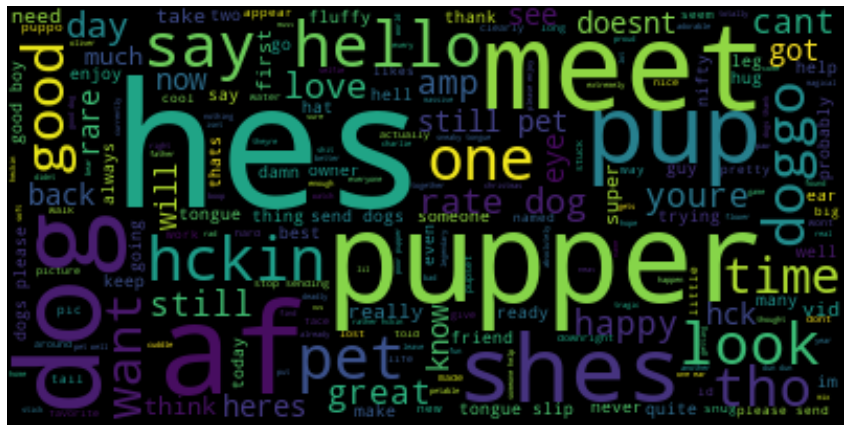

In [340]:
clean_text = ' '.join(list(twitter_archive_master.text))
wordcloud = WordCloud().generate(clean_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

This looks good. No more processing needs to be done on the textual data to create this visualization. 

## Data Storage

The cleaned master dataset will be saved to a csv file and saved to a SQLLite database. The purpose of this is to maintain intergrity of the dataset by saving it to a relational database and to allow for a local csv file to continue analyzing in pandas or Excel without integrity guarantees.

In [341]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

In [342]:
twitter_archive_master.sample(3)

,tweet_id,text,rating_numerator,rating_denominator,p1,p1_conf,retweet_cnt,like_cnt
1571,676819651066732545,watch out airbud this pupper is also good at t...,12,10,NaN,NaN,654.0,1792.0
2050,666786068205871104,unfamiliar with this breed ears pointy af wont...,2,10,NaN,NaN,463.0,719.0
350,819004803107983360,this is bo he was a very good first doggo 14/1...,14,10,standard_poodle,0.351308,37613.0,88493.0


In [343]:
import sqlite3

In [344]:
create_table_str = """CREATE TABLE IF NOT EXISTS twitter_archive_master
    (tweet_id INT NOT NULL,
    text TEXT,
    rating_numerator INT,
    rating_denominator INT,
    p1 TEXT, p1_conf FLOAT,
    retweet_cnt INT,
    like_cnt INT,
    PRIMARY KEY (tweet_id))
"""

In [345]:
conn = sqlite3.connect("twitter_archive_master.db")
c = conn.cursor()
temp_write_df = twitter_archive_master.where(twitter_archive_master.notnull(), None)
c.execute("DROP TABLE IF EXISTS twitter_archive_master")
c.execute(create_table_str)
for _, row in temp_write_df.iterrows():
    add_quotes = lambda x: "'" + x + "'"
    record = (row.tweet_id, add_quotes(row.text), row.rating_numerator, row.rating_denominator,
              row.p1, row.p1_conf, row.retweet_cnt, row.like_cnt)
    c.execute("INSERT INTO twitter_archive_master VALUES (?,?,?,?,?,?,?,?)", record)

conn.commit()

In [346]:
ans = c.execute("SELECT * FROM twitter_archive_master")
ans.fetchone()

(892420643555336193,
 "'this is phineas hes a mystical boy only ever appears in the hole of a donut 13/10 '",
 13,
 10,
 None,
 None,
 7739,
 36367)

In [347]:
conn.close()

## End of Data Wrangling

Now that we have addressed all the data quality and structure issues, and saved the results to a csv file and a sqllite database, we can begin the analysis stage.

## Analysis

Before we start the analysis, we should consider engineering features to simplify the analytics. Recall the three analysis we want to perform which was mentioned earlier in the jupyter notebook):

```

The first analysis of interest is the relationship between ratings and retweet/ like counts. Is there a correlation between retweets/ likes and rating or is the rating more symbolic then predictive? 

The second analysis will be what is the distribution of predicted dog breed to retweet/ like counts. Do users have a favorite breed or are they all mostly even? What is the distribution of confidence of the breeds predicted?

The third analysis of interest is a word cloud of aggregate text for all the textual posts. This will show us the most popular words of the WeRateDogs page. We aim to not have punctuation, and to have mostly nouns and verbs. We want to see words like 'dog' and 'puppy' rather then words like 'the' and 'and'. We also don't want 'DOG' and 'Dog' to appear as well in our word bubble.

```

Ratings and retweet/likes we would like to see if there is a relationship between the two of them. However in their current state that would be four metrics to compare against. We will first see if we can combine retweets and likes to a common popularity score. If they are highly correlated it makes sense to take the average number of the two features with no weight. 

Recall that when we were investigating the dog ratings we noticed that a lot of the time when we had a high numerator and denominator we would be rating multiple dogs at once. This means we can create a third floating point feature that divides the numerator by the denominator to get a floating point score which we will use.

After we implement the new features we can begin our analysis

### Pre Analysis Feature Engineering and Univariate Plot Exploration

In [348]:
twitter_archive_master_clean  = twitter_archive_master.copy()

First we will implement the new floating point column for the rating of the dogs.

In [349]:
twitter_archive_master_clean["rating"] = twitter_archive_master_clean["rating_numerator"] / twitter_archive_master_clean["rating_denominator"]

We can now look at the distribution of ratings to see if we have outliers that might mess up our analysis

In [350]:
twitter_archive_master_clean.rating.describe()

count    2096.000000
mean        1.164981
std         3.963799
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

As we can see we have an incredibly high outlier that is nowhere near our center. We can view it visually in a box plot

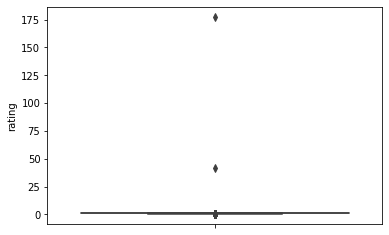

In [351]:
sb.boxplot(data=twitter_archive_master_clean, y="rating");

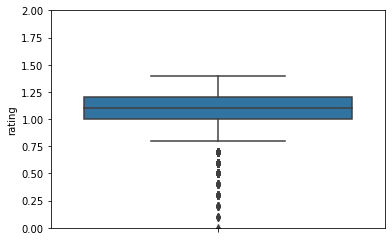

In [352]:
sb.boxplot(data=twitter_archive_master_clean, y="rating");
plt.ylim(0,2);

We can see here that we have outliers in both directions, however our outlier around rating 50 and 175 seem to make it very hard to do analysis on the ratings. We require to see a rating from 0-2 as that is the majority of our data. We see below that we have one point at around 50 and the other at 175. It would be better to drop these ratings because they won't be useful for our analysis and will heavily skew our results and are very rare occurrances

In [353]:
(twitter_archive_master_clean.rating > 2).sum(), (twitter_archive_master_clean.rating < 0.75).sum()

(2, 165)

We can see that below the lower whisker we have about 165 ratings. These would be useful to keep in our analysis because they represent a decent sized chunk of the dataset

In [354]:
twitter_archive_master_clean = twitter_archive_master_clean[twitter_archive_master_clean.rating < 2]

In [355]:
assert twitter_archive_master_clean.shape[0] + 2 == twitter_archive_master.shape[0]
assert twitter_archive_master_clean.shape[1] - 1 == twitter_archive_master.shape[1]

We can now view a plot of the ratings to see how our ratings feature's distribution looks

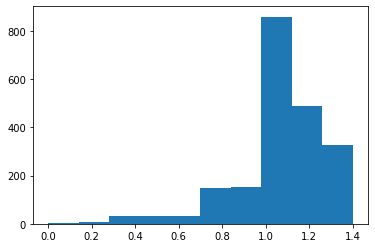

In [356]:
plt.hist(data=twitter_archive_master_clean, x="rating");

We can now see a left skewed ratings with the top rating being 1.4 with the bottom being 0. We can also see that around 1.0 is the most frequently occuring rating.

In [357]:
twitter_archive_master_clean.sample(1)

,tweet_id,text,rating_numerator,rating_denominator,p1,p1_conf,retweet_cnt,like_cnt,rating
1371,685906723014619143,this is olive hes stuck in a sleeve 9/10 damn ...,9,10,Yorkshire_terrier,0.414963,2892.0,7525.0,0.9


Next we can view the correlation between likes and retweets to see if we can aggregate those two measures to one single popularitys core. If they are highly correlated then we can simplify our analysis by averaging them, if not we can make two plots, ratings to retweets and ratings to likes

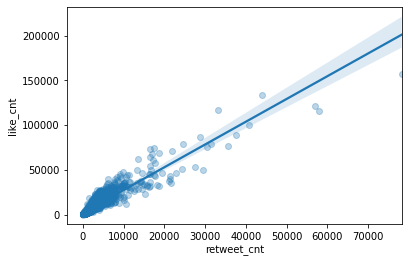

In [358]:
sb.regplot(data=twitter_archive_master_clean, x="retweet_cnt", y="like_cnt",
          scatter_kws={'alpha': 0.3});

It seems they are heavily correlated, but the majority of the points are between 0 to 20000. It would be more useful to limit the axis to see the relationship in that section of points. Also viewing the correlation coefficient could be helpful

(0, 20000)

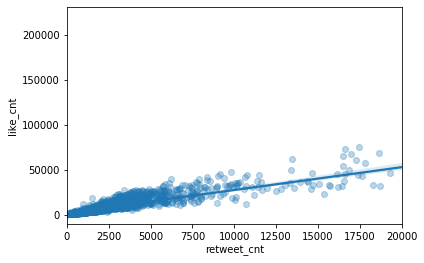

In [359]:
sb.regplot(data=twitter_archive_master_clean, x="retweet_cnt", y="like_cnt",
          scatter_kws={'alpha': 0.3});
plt.xlim(0, 20000)

Now we can see that there is a much less dramatic relationship between the two variables then what was viewed in the previous plot

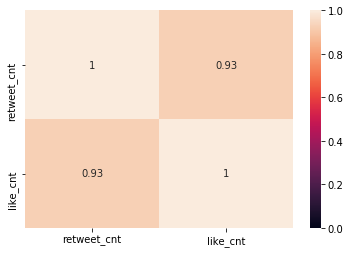

In [360]:
cols = ["retweet_cnt", "like_cnt"]
sb.heatmap(twitter_archive_master_clean[cols].corr(), cmap='rocket', annot=True,
          vmin=0);

As we can see these two variables have an extremely high correlation coefficient and a very clear linear relationship. Therefore it makes sense to average the two values and create a popularity rating. 

In [361]:
twitter_archive_master_clean["popularity"] = (twitter_archive_master_clean["retweet_cnt"] + twitter_archive_master_clean["like_cnt"]) / 2

Test: We will test to see if the average of the two columns is equal to the new popularity score and we will test if we have two more columns then the original df with no feature engineering

In [362]:
avg_pop = (twitter_archive_master_clean["retweet_cnt"].mean() + twitter_archive_master_clean["like_cnt"].mean()) / 2
assert avg_pop == twitter_archive_master_clean.popularity.mean()
assert twitter_archive_master_clean.shape[1] - 2 == twitter_archive_master.shape[1]

We can now look at a histogram of popularity scores

/home/shanelester/miniconda3/envs/weratedogs/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shanelester/miniconda3/envs/weratedogs/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


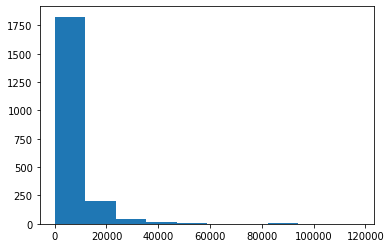

In [363]:
plt.hist(data=twitter_archive_master_clean, x="popularity");

We see a heavy right skew with some the majority of values getting between 0 to 10,000 popularity.

We can zoom in on that area to seee the distribution

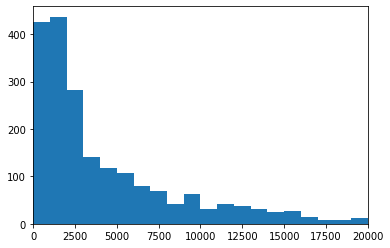

In [364]:
bins = np.arange(0, 20000 + 1000, 1000)
plt.hist(data=twitter_archive_master_clean, x="popularity", bins=bins);
plt.xlim(0, 20000);

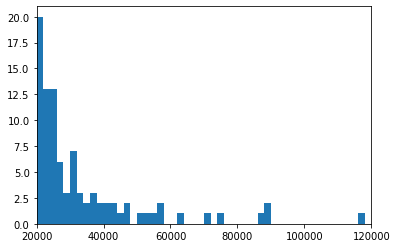

In [365]:
bins = np.arange(20000, 120000, 2000)
plt.hist(data=twitter_archive_master_clean, x="popularity", bins=bins);
plt.xlim(20000, 120000);

We can see below that the distribution of scores between 0 to 2500 make up the majority of the rankings. But we also small pockets of very popular posts. The highest being 120000.

### Analysis 1: The Relationship Between Dog Rating and Dog Popularity

We can now view the relationship of ratings and popularity. We will use a correlation heat map and a scatterplot to view the relationship

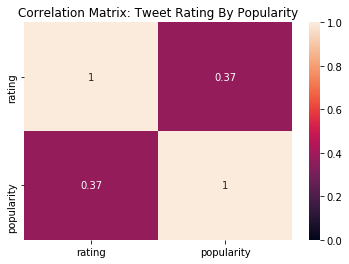

In [366]:
cols = [ "rating", "popularity"]
sb.heatmap(twitter_archive_master_clean[cols].corr(), cmap='rocket', annot=True,
          vmin=0);
plt.title("Correlation Matrix: Tweet Rating By Popularity");

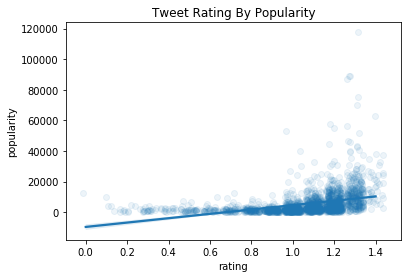

In [367]:
sb.regplot(data=twitter_archive_master_clean, x=cols[0], y=cols[1],
           y_jitter=0.04,
           x_jitter=0.04,
          scatter_kws={'alpha': 0.08});
plt.title("Tweet Rating By Popularity");

### Interpretation

Their is a small to medium correlation between popularity and score, with a positive relationship of score and popularity.

One theory of why this might be the case is because the WeRateDogs user tends to publish non dog photos for low rated dogs and very cute dog photos (especially puppies) for high rated dogs. Although I personally find them funny, perhaps users don't enjoy the posts that aren't dogs. .

Another interesting result is that the most popular dogs tend to peak at 1.1 to 1.3, the peak  being 1.3. Perhaps the dogs in this area have a particular quality that users like,  like they are mostly puppies while 1.0 tends to be older dogs and 1.4 tends to be inspirational stories.

These results, of course, are tentative and a hypothesis test would need to be run to confirm that they aren't caused by randomness. Recall also are just theories, we can't explain the cause of the results without carefully crafted experiments.

### Findings

Initially, I believed that the ratings were just for fun and would have no relationship with the post popularity. However, this analysis shows that there is a positive correlation between ratings and popularity and they actually may provide predicitve power on how popular a post would be. This would require further and a more rigorous investigation to confirm.

## Analysis 2: Predicted Dog Breeds and Popularity

We will now explore the most popular dog breeds. Note that these are predicted dog breeds through a nueral network, so we will first explore the distribution of confidence in the predictions to see if the images are accurate and then we can view the relationship between the types of dogs and the popularity.

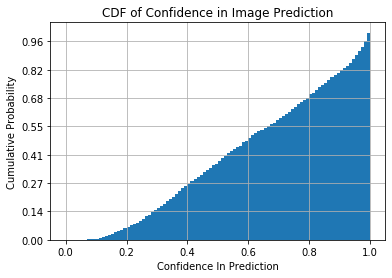

In [368]:
total_amt = twitter_archive_master_clean.p1_conf.notna().sum()
bins = np.arange(0,  1+0.01, 0.01)
y_ticks = np.arange(0,  1600,  200)
y_labels = ['{:.2f}'.format(y_val / total_amt) for y_val in y_ticks]
# y_labels = ["{:.2f}".format(y_val / total_amt) for y_val in y_ticks]
twitter_archive_master_clean.p1_conf.hist(bins=bins, cumulative=True);
plt.yticks(ticks = y_ticks, labels=y_labels);
plt.xlabel("Confidence In Prediction")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Confidence in Image Prediction");

First note the near linear slope of the CDF. This shows that there is a similar amount of confidence from, for example, 0.2 - 0.4 and 0.8 to 1.0. This isn't a good thing. We would perfer the bulk of our probability to be in the 0.9-1.0 range. This shows us that we need to understand these predicitions are not flawless. 

Only about 20% of them are 90-100% correct whie roughly 70% of them are below 80% sure in their prediction. The probability that the prediction is below 30% confident is about 15%. 

That being said, for our purposes this is acceptable. Many dog breeds look similar and many humans may mistake some dog breeds for each other (like a puppy beagle and a puppy dacshund).  So even though these image predictions aren't perfect, they are probably pretty close to being how a human would interpret a dog breed. Therefore these image predictions are still a good indicator for the purposes of our analytics.

Now that we understand the accuracy of the dog breed predictions, we can view the relationship between the type of dog and the popularity. We can use a horizontal bar chart with count on the x axis and probability written directly on the graph

In [369]:
chosen_cols = ["p1", "popularity", "rating"]
popularity_by_breeds_df = twitter_archive_master_clean[chosen_cols].copy()
popularity_by_breeds_df = popularity_by_breeds_df[popularity_by_breeds_df.p1.notna()]
popularity_by_breeds_df["p1"] = popularity_by_breeds_df.p1.apply(lambda x: x.lower())
popularity_by_breeds_df = popularity_by_breeds_df.groupby(["p1"]).mean().reset_index()
popularity_by_breeds_df.sort_values(by='popularity', ascending=False, inplace=True)

Because there are a lot of dog breeds, lets see the top and bottom 20 only of popularity

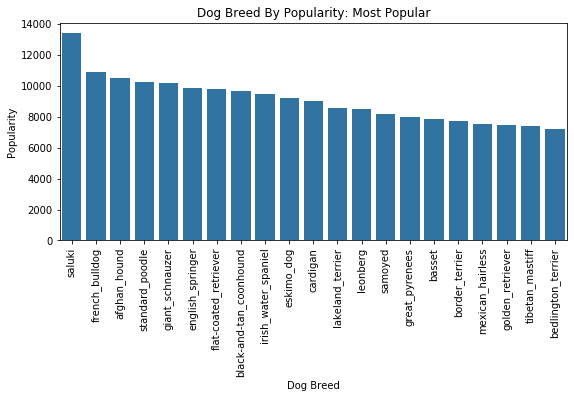

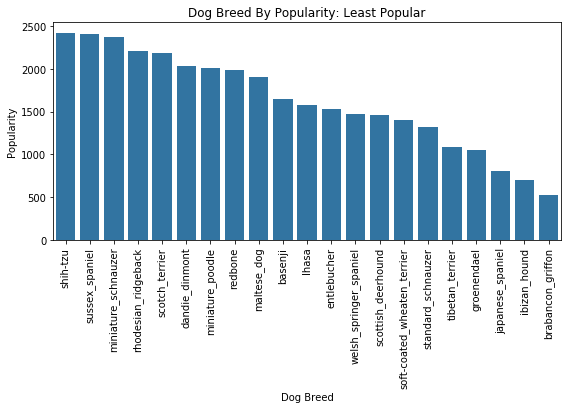

In [370]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(20, 4 ))
plt.subplot(1, 2, 1)
sb.barplot(data=popularity_by_breeds_df.iloc[0:21],
             y="popularity", x="p1",color=base_color)
plt.xticks(rotation=90);
plt.xlabel("Dog Breed")
plt.ylabel("Popularity");
plt.title("Dog Breed By Popularity: Most Popular");
plt.figure(figsize=(20, 4 ))
plt.subplot(1,2,2)
sb.barplot(data=popularity_by_breeds_df.iloc[-21:],
             y="popularity", x="p1",color=base_color)
plt.xticks(rotation=90);
plt.xlabel("Dog Breed")
plt.ylabel("Popularity");
plt.title("Dog Breed By Popularity: Least Popular");

### Interpretation:

We can now see historically what dog breeds are most and least popular for twitter likes and retweets. We grouped the data together and averaged the popularity each time that breed occurred. We can see that saluki, french bulldogs, and afghan hounds rounded up the top 3 and japanese spanial, ibizan hounds, and brabancon griffins rounded out the bottom 3. 

This analysis has major limitations. There are too many dog breeds with too similar scores to really be able to make fair comparisons. Dog breeds as a categorical variable therefore doesn't lead to very usable results. Nobody knows all the different breeds to this amount of depth, so it isn't useful to have them as a categorical variable.

This could be made better by gathering more data on metrics about breeds and building scatterplots to see if certain things, like height and weight, are correlated to more popular posts. This would be done by gathering metrics of interest on each dog breed from an additional source and then joining it on to the master table, joining by dog breed rather then twitter id.

### Conclusion

The resulting visualizations with the current data gathered isn't very interesting or helpful for our analysis. It would be better if we grabbed more information about the dog breeds, such as height and weight, and made a scatter plot on those metrics and popularity to see what kinds of dogs are the most popular.

### Analysis 3: Textual Analysis

The third and final analysis is the visualization of the textual data using the wordcloud library. We can also use the words to perform a basic sentiment analysis using the library TextBlob.

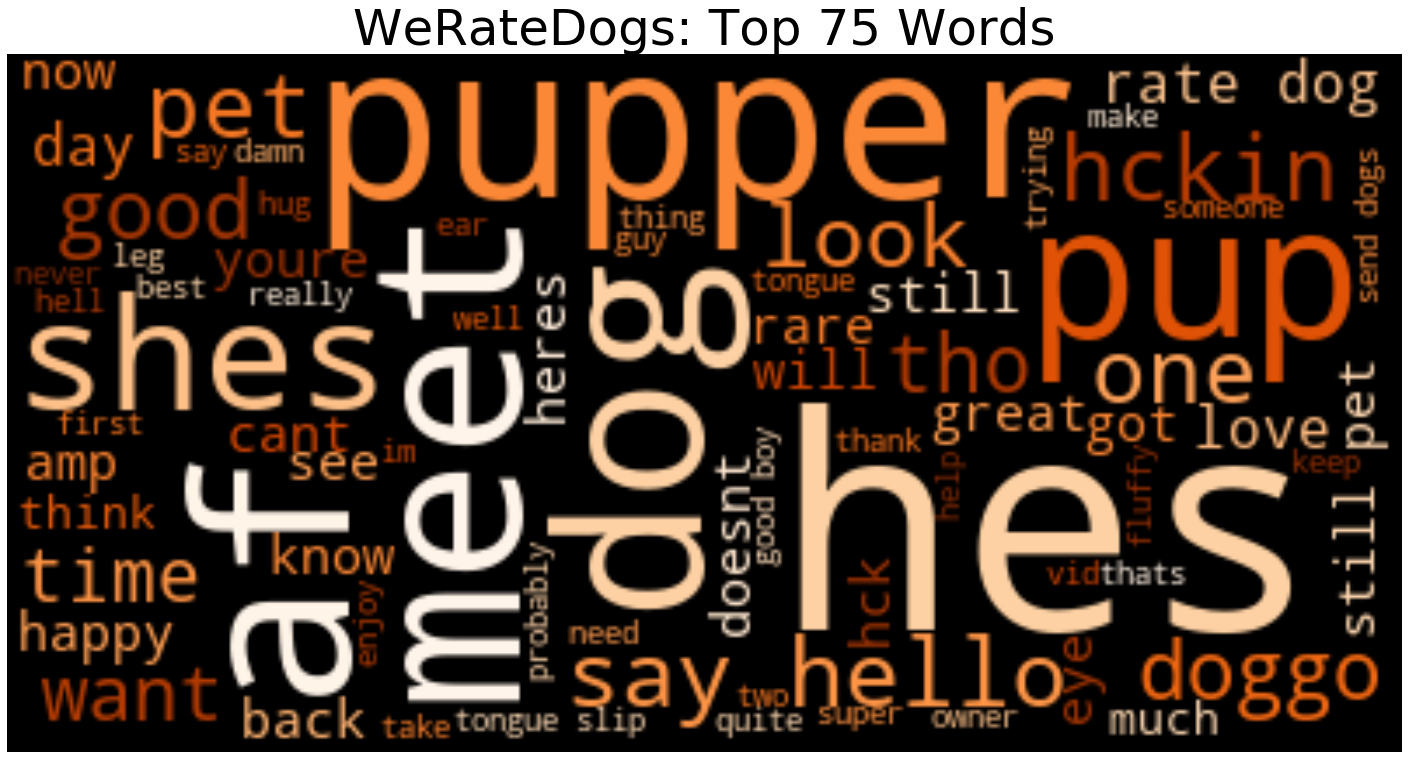

In [371]:
clean_text = ' '.join(list(twitter_archive_master_clean.text))
wordcloud = WordCloud(background_color="black", max_words=75, min_font_size=8,colormap='Oranges').generate(clean_text)
plt.figure(figsize=(25,25))
im = plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");
plt.title("WeRateDogs: Top 75 Words", fontdict={'fontsize': 50});

We can see how popular words compare to each other. We see words like `pup`, `doggo`, `pupper`, `hckin` `hck`, `af`, `good boy`, and many more. It also shows us the WeRateDog user uses `doggo` less then `pupper` and uses `she` less then `hes`. Because we can assume girl and boy dogs are received as photos at similar rates, the WeRateDogs user interprets more of them as boys. Interestingly the WeRateDogs user also uses `good boy` frequently, which could be why they interpret them as boys. So they can say `good boy`.

Lastly we will perform a sentiment analysis to see whether the text is considered positive or negative and if it is subjective or objective.

In [372]:
from textblob import TextBlob
word_dict = wordcloud.__dict__["words_"]
all_strings = []
for key, value in word_dict.items():
    all_strings.append((key + ' ') * int(round((value * 100), 0)))
word_cloud_weighted_string = ''.join(all_strings)
opinion = TextBlob(word_cloud_weighted_string)
opinion.sentiment

Sentiment(polarity=0.48656462585034016, subjectivity=0.5755102040816323)

In [373]:
opinion = TextBlob(clean_text)
opinion.sentiment

Sentiment(polarity=0.15997618700234048, subjectivity=0.5881630642025895)

According to the sentiment analysis both the wordcloud top words and the entire clean text have a similar subjectivity rating. Subjectivity is a number 0, 1 where 0 is completely objective and 1 is completely subjective. The tweets are considered to be about 0.6 in both, leaning towards being more subjective then objective.

Polarity is between -1 and 1, and indicates whether it is a positive or negative opinion. The TextBlob most popular words are considered to be much more positive (about 3 times) then the overall words. This makes sense, because the very popular words are all generally pretty happy (like `super`, `hug`, and `pet`) but overall some of the tweets are jokingly pretty negative (something like `this doggo has to get his life together`). 

## Interpretation

The textual analysis provides us the top words used as a wordcloud. This allows us to compare the top 75 most popular words and see how they relate in usage to each other. We can see the ones WeRateDogs are most famous for, like `doggo`, `pupper`, `af`, and `hckin`.

The sentiment analysis allows us to see that both the word cloud top 75 words and the overall textual data is positive and subjective. Interestly, the top 75 most popular words used are about 3 times more positive then the entire corpus of tweets.

## Conclusion

Overall we accomplished several things with our analysis of the twitter user WeRateDogs. 

We have seen that in general there is a pattern to the ratings WeRateDogs gives and the popularity of the tweets. We see that in the range of 11/10 to 13/10 the tweets tend to be most popular. 0-9/10 tend to be the least popular. 14/10 tends to be inbetween. This could be due to the types of dogs he gives those ratings too, for example he could be placing puppys in the 11/10 - 13/10 range, non dogs in the 0-9/10 range, and inspirational stories in the 14/10 range. To my surprise the ratings actually have a high potential for predictive power and may not be just for fun, which I initially thought.More rigorous testing should be done to explore the statistical significance of that finding, it is only tentative at this moment in time.

An analysis was done to see which dog breeds were the most and least popular. However, due to the large amount of different dog breeds and the small differences in popularity, that analysis wasn't helpful. 

However, web data could be gathered for metrics of interest in different dog breeds (say height and weight) and generatting a scatterplot to a metric and popularity would be much more interesting. That has the potential to show predictive results in what kinds of dog breeds to post for the highest chance of retweets and likes.

The final analysis was a textual analysis of all the tweets. We created a wordcloud to see the most popular words in all the tweets. This allowed us to see the relative frequency of words he used and proved interesting to see how they compared together. They told a story of what is frequently mentioned in those tweets. 

Lastly we performed a sentiment analysis and found that the tweets were general positive and subjective. Interestingly, the top 75 words used in the word cloud were roughly 3 times more positive then the corpus. This means that the top words he uses are much more positive then the tweets themselves. 

Further investigation could be done using the timestamps and seeing the populariy of the tweets relative to time of day and if they have been getting more popular over time. Because the timestamp data is present in the raw data source, this would be an easy and quick analysis to perform and would probably have predictive power.

Lastly, all analysis was exploratory in nature, so further investigation to find statistical significance in any of these explorations would also add to the value of this analysis.
